In [1]:
import numpy as np

inputs = np.load('inputs.npy')
print(inputs.shape)

trues = np.load('trues.npy')
print(trues.shape)

preds = np.load('preds.npy')
print(preds.shape)

(445, 12, 2, 32, 32)
(445, 12, 2, 128, 128)
(445, 12, 2, 128, 128)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data
inputs = np.load('inputs.npy')
trues = np.load('trues.npy')
preds = np.load('preds.npy')

# Randomly select a sample
sample_idx = np.random.randint(inputs.shape[0])
print(sample_idx)

def plot_channel(channel_data, title, save_name):
    """
    Helper function to plot a single channel's data.
    """
    plt.figure(figsize=(20, 5))
    for t in range(12):
        plt.subplot(1, 12, t+1)
        plt.imshow(channel_data[t], cmap=None)
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(title, y=1.05)  # Adding a title for better differentiation
    plt.savefig(save_name, dpi=300)
    plt.close()

# Plot inflow
plot_channel(inputs[sample_idx, :, 0], 'Inflow Inputs', 'inflow_inputs.png')
plot_channel(trues[sample_idx, :, 0], 'Inflow Trues', 'inflow_trues.png')
plot_channel(preds[sample_idx, :, 0], 'Inflow Preds', 'inflow_preds.png')

# Plot outflow
plot_channel(inputs[1, :, 1], 'Outflow Inputs', 'outflow_inputs.png')
plot_channel(trues[1, :, 1], 'Outflow Trues', 'outflow_trues.png')
plot_channel(preds[1, :, 1], 'Outflow Preds', 'outflow_preds.png')


212


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Load the data
inputs = np.load('inputs.npy')
trues = np.load('trues.npy')
preds = np.load('preds.npy')

# Randomly select a sample
sample_idx = np.random.randint(inputs.shape[0])
print(sample_idx)

def visualize_step(sample_idx, time_step):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  

    # Input
    axes[0].imshow(inputs[sample_idx, time_step, 0], cmap="viridis", origin="upper")
    axes[1].imshow(inputs[sample_idx, time_step, 1], cmap="viridis", origin="upper")

    # True
    axes[2].imshow(trues[sample_idx, time_step, 0], cmap="viridis", origin="upper")
    axes[3].imshow(trues[sample_idx, time_step, 1], cmap="viridis", origin="upper")

    # Pred
    axes[4].imshow(preds[sample_idx, time_step, 0], cmap="viridis", origin="upper")
    axes[5].imshow(preds[sample_idx, time_step, 1], cmap="viridis", origin="upper")

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    
    # Save the figure to a file and return the filename
    filename = f"temp_step_{time_step}.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    return filename

# Generate the visualizations
filenames = [visualize_step(sample_idx, t) for t in range(12)]

# Convert to gif
imageio.mimsave('sample_visualization.gif', [imageio.imread(f) for f in filenames], duration=0.5)

# Cleanup temp files
for f in filenames:
    os.remove(f)


322


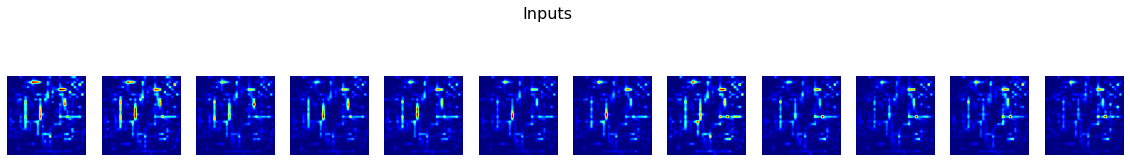

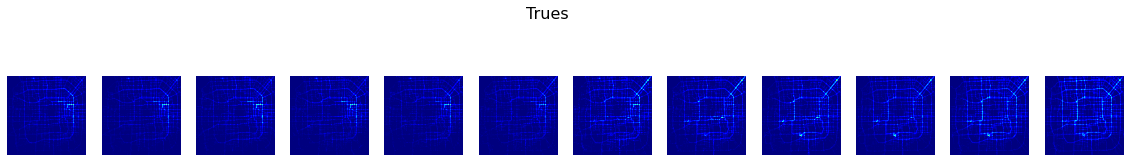

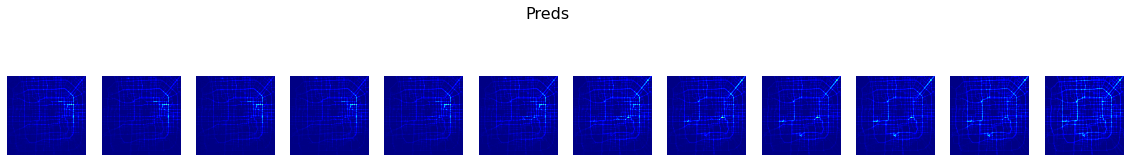

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

inputs = np.load('inputs.npy')
trues = np.load('trues.npy')
preds = np.load('preds.npy')

sample_idx = random.randint(0,445) 


plt.figure(figsize=(20, 10))
for i in range(12):
    plt.subplot(3, 12, i+1)  
    plt.imshow(inputs[sample_idx, i, 0], cmap='jet')  
    plt.axis('off')  
plt.suptitle('Inputs', y=0.92, fontsize=16)


plt.figure(figsize=(20, 10))
for i in range(12):
    plt.subplot(3, 12, i+1)  
    plt.imshow(trues[sample_idx, i, 0], cmap='jet')  
    plt.axis('off')  
plt.suptitle('Trues', y=0.92, fontsize=16)


plt.figure(figsize=(20, 10))
for i in range(12):
    plt.subplot(3, 12, i+1)  
    plt.imshow(preds[sample_idx, i, 0], cmap='jet')  
    plt.axis('off') 
plt.suptitle('Preds', y=0.92, fontsize=16)

plt.show()


In [6]:

import torch
ape = torch.abs(torch.tensor(preds) - torch.tensor(trues)) / (trues + 1e-8)
ape[torch.tensor(trues) == 0] = 0  # set APE to zero where true value is zero
mape = torch.mean(ape).item() * 100


mae = torch.mean(torch.abs(torch.tensor(preds) - torch.tensor(trues))).item()

print('mape:', mape, 'mae:', mae)
sample_idx = np.random.randint(len(inputs))
# Plot the input, true, and predicted data for the chosen sample
fig, axs = plt.subplots(nrows=3, ncols=12, figsize=(20, 6),dpi=1000,gridspec_kw={'hspace': 0.001, 'wspace': 0.01})
for i in range(12):
    # Inflow channel in inputs
    axs[0, i].imshow(inputs[sample_idx, i, 1], cmap='magma')
    #axs[0, i].set_title(f'Inputs Inflow t={i}')
    axs[0, i].axis('off')
    # Inflow channel in trues
    axs[1, i].imshow(trues[sample_idx, i, 1], cmap='magma')
    #axs[1, i].set_title(f'Trues Inflow t={i}')
    axs[1, i].axis('off')
    # Inflow channel in preds
    axs[2, i].imshow(preds[sample_idx, i, 1], cmap='magma')
    #axs[2, i].set_title(f'Preds Inflow t={i}')
    axs[2, i].axis('off')

plt.show()

mape: 25.987213850021362 mae: 2.2795345783233643


In [ ]:

import torch
ape = torch.abs(torch.tensor(preds) - torch.tensor(trues)) / (trues + 1e-8)
ape[torch.tensor(trues) == 0] = 0  # set APE to zero where true value is zero
mape = torch.mean(ape).item() * 100


mae = torch.mean(torch.abs(torch.tensor(preds) - torch.tensor(trues))).item()

print('mape:', mape, 'mae:', mae)
sample_idx = np.random.randint(len(inputs))
# Plot the input, true, and predicted data for the chosen sample
fig, axs = plt.subplots(nrows=3, ncols=12, figsize=(20, 6),dpi=1000,gridspec_kw={'hspace': 0.001, 'wspace': 0.01})
for i in range(12):
    # Inflow channel in inputs
    axs[0, i].imshow(inputs[sample_idx, i, 1], cmap='magma')
    #axs[0, i].set_title(f'Inputs Inflow t={i}')
    axs[0, i].axis('off')
    # Inflow channel in trues
    axs[1, i].imshow(trues[sample_idx, i, 1], cmap='magma')
    #axs[1, i].set_title(f'Trues Inflow t={i}')
    axs[1, i].axis('off')
    # Inflow channel in preds
    axs[2, i].imshow(preds[sample_idx, i, 1], cmap='magma')
    #axs[2, i].set_title(f'Preds Inflow t={i}')
    axs[2, i].axis('off')

plt.show()